In [1]:
# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

# Import from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set a random seed
np.random.seed(42)

# Data Visualization
sns.set_theme(context='notebook', style='darkgrid', palette='bright')

In [2]:
train = pd.read_csv('datasets/clean-avg-train-combined-with-location-data.csv')
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total,lat,long
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,42.019063,-87.672892
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,42.015876,-87.669092
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,42.008362,-87.665909
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,42.001073,-87.661061
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,41.993664,-87.659202


#### **Preprocessing**

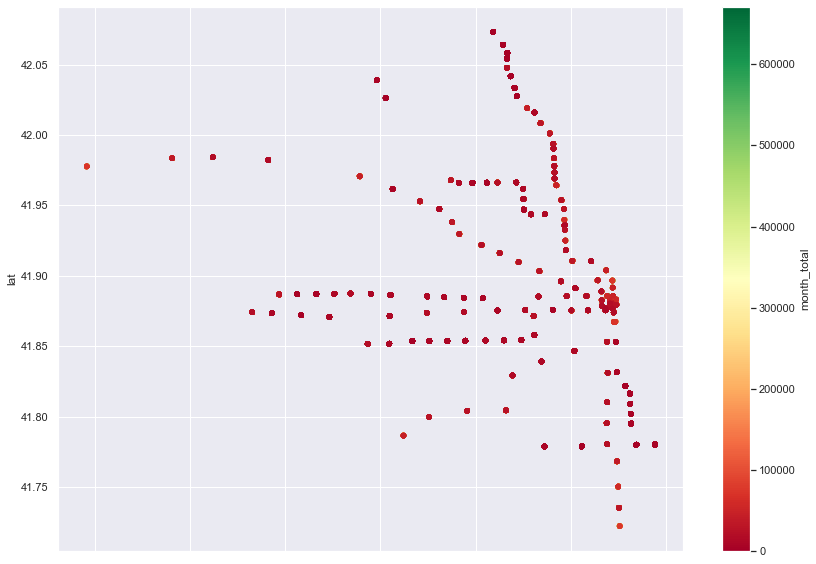

In [3]:
train.plot(kind="scatter", x="long", y="lat", c="month_total",
         cmap="RdYlGn", figsize=(14, 10));

#### **KMeans Clustering**

In [4]:
X = train[['long','lat','month_total']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [5]:
%%time
# Function to search through k clusters
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

Wall time: 10min 39s


In [6]:
score_df.sort_values(by=['silhouette'], ascending=False).head(5)

,k,inertia,silhouette
14,16,9314.572793,0.420851
13,15,9939.920477,0.419102
16,18,8074.999039,0.418583
25,27,5209.609905,0.418539
28,30,4608.416290,0.417821


#### **Visualize clusters**

Text(0.5, 1.0, 'Silhouette Score over k')

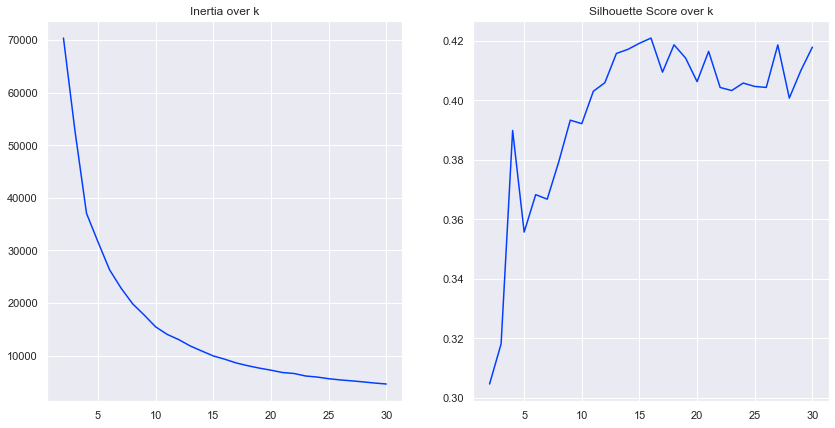

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [8]:
km = KMeans(n_clusters=16)
km.fit(X_sc)
# Scaled X gives best results
df=train.copy()
df['cluster'] = km.labels_

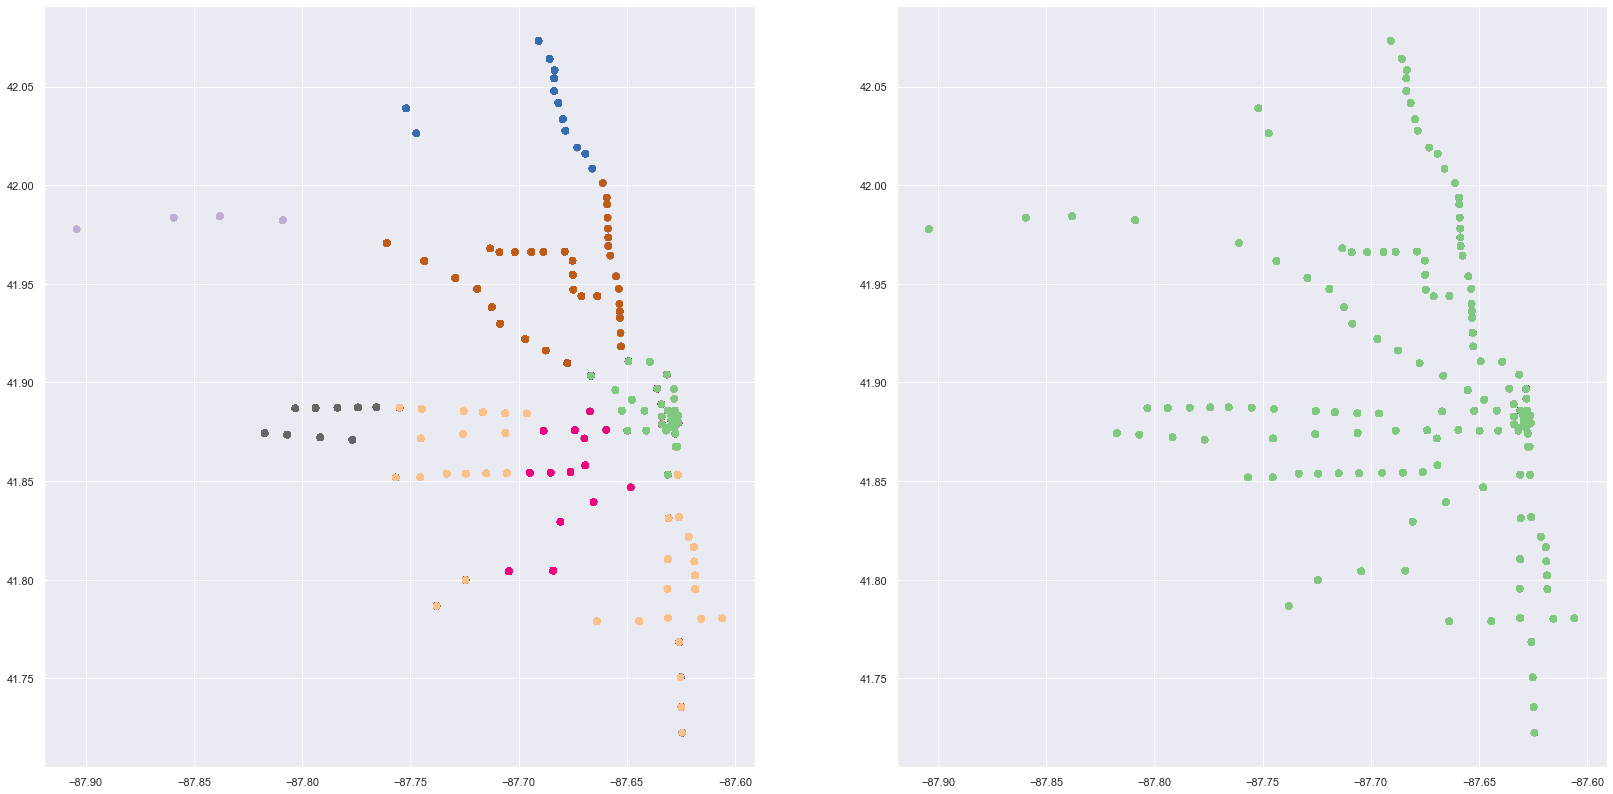

In [9]:
plt.figure(figsize=(28,14))
plt.subplot(1,2,1)
plt.scatter(df.long, df.lat, c=df.cluster, cmap="Accent");
plt.subplot(1,2,2)
plt.scatter(df.long, df.lat,c= df.month_total, cmap="Accent");

#### **KMeans Clustering II**

In [10]:
X_all = train[['avg_weekday_rides','avg_saturday_rides', 'avg_sunday-holiday_rides', 
                    'month_total', 'lat', 'long',]]
sc = StandardScaler()
X_all_scaled = sc.fit_transform(X_all)

In [11]:
%%time
# GridSearch to find the best number of cluster
all_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_all_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_all_scaled, cl.labels_)
    all_list.append([k, inertia, sil])
    
all_df = pd.DataFrame(all_list)
all_df.columns = ['k', 'inertia', 'silhouette']           

Wall time: 12min 15s


In [12]:
all_df.sort_values(by=['silhouette'], ascending=False).head(5)

,k,inertia,silhouette
0,2,118199.536441,0.534124
23,25,15077.708447,0.379366
21,23,16429.123755,0.377793
26,28,13489.566576,0.375705
27,29,13122.547908,0.369939


Text(0.5, 1.0, 'Silhouette Score over k')

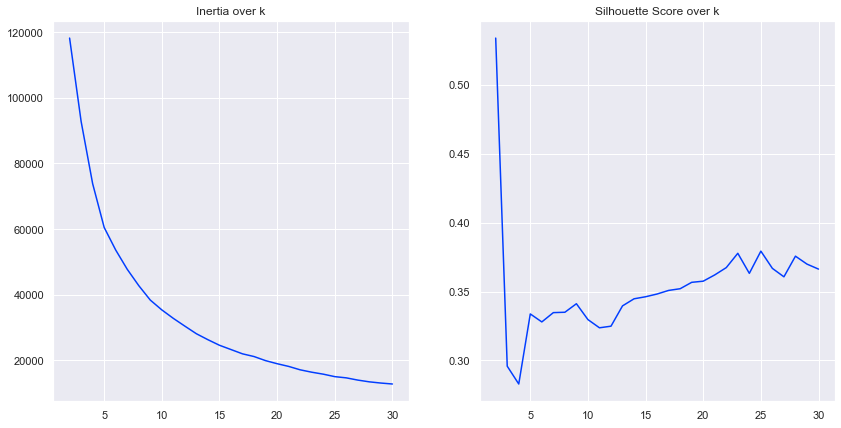

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(all_df.k, all_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(all_df.k, all_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [14]:
km_all = KMeans(n_clusters=2)
km_all.fit(X_sc)
# Scaled X gives best results
df['cluster_all'] = km_all.labels_

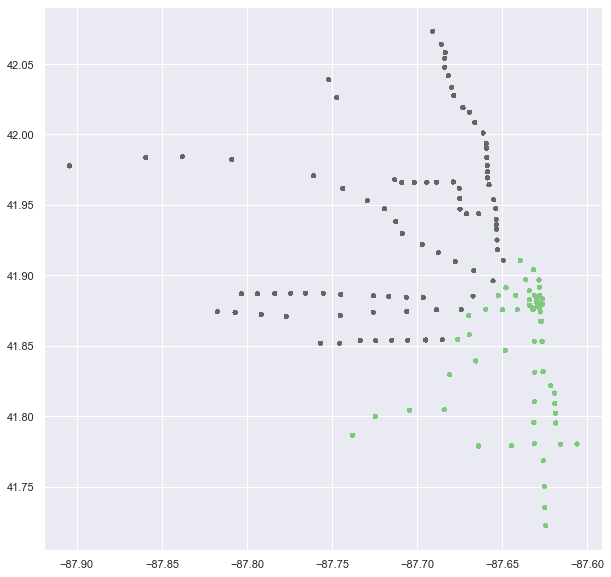

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_all, s=10, cmap="Accent");

#### **KMeans Clustering: Date**

In [16]:
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total,lat,long
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,42.019063,-87.672892
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,42.015876,-87.669092
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,42.008362,-87.665909
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,42.001073,-87.661061
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,41.993664,-87.659202


In [17]:
oh = OneHotEncoder(categories="auto", sparse=False)
train['year'] = pd.to_datetime(train['month_beginning']).dt.year
train['month'] = pd.to_datetime(train['month_beginning']).dt.month
train['year'] = oh.fit_transform(np.array(train['year']).reshape(-1,1))
train['month'] = oh.fit_transform(np.array(train['month']).reshape(-1,1))

In [18]:
X_date = train[['month_total', 'lat', 'long', 'year', 'month']]
sc = StandardScaler()
X_date_scaled = sc.fit_transform(X_date)

In [19]:
%%time
# GridSearch to find the best number of cluster
date_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_date_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_date_scaled, cl.labels_)
    date_list.append([k, inertia, sil])
    
date_df = pd.DataFrame(date_list)
date_df.columns = ['k', 'inertia', 'silhouette']  

Wall time: 11min 13s


In [20]:
date_df.sort_values(by=['silhouette'], ascending=False).head(5)

,k,inertia,silhouette
1,3,104155.209099,0.495966
0,2,136762.351286,0.456613
26,28,11612.353942,0.418068
28,30,10688.250218,0.412262
25,27,11938.603256,0.410193


Text(0.5, 1.0, 'Silhouette Score over k')

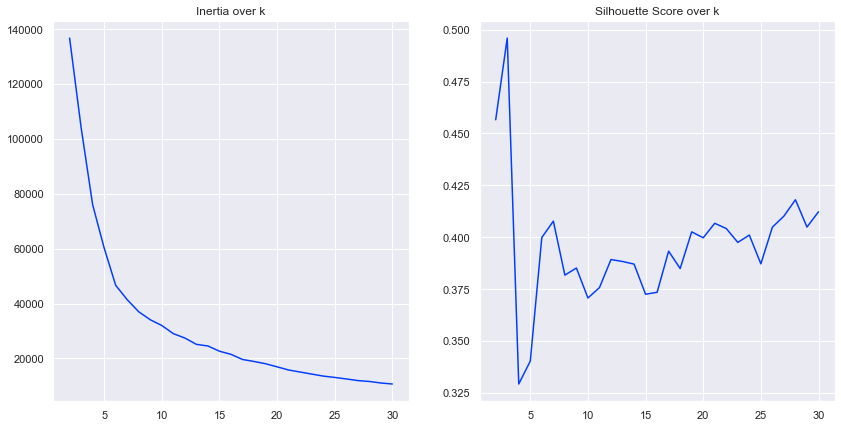

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(date_df.k, date_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(date_df.k, date_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [22]:
km_date = KMeans(n_clusters=3)
km_date.fit(X_sc)
# Scaled X gives best results
df['cluster_date'] = km_date.labels_

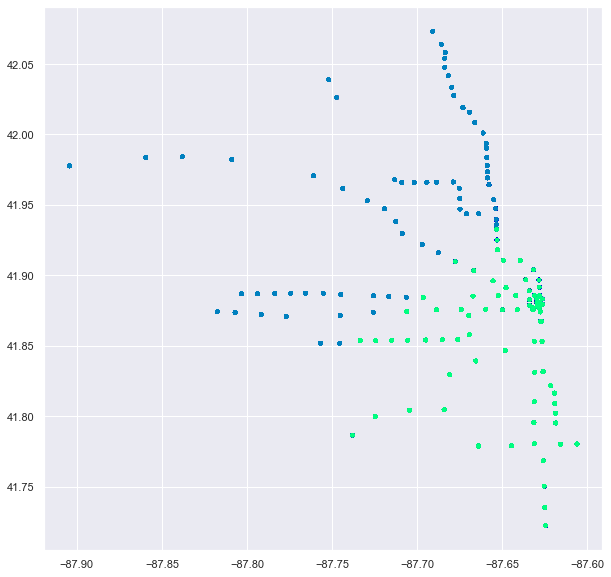

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_date, s=10, cmap="winter");

#### **KMeans Clustering: Location Only**

In [24]:
X_loc = train[['lat', 'long']]
sc = StandardScaler()
X_loc_scaled = sc.fit_transform(X_loc)

In [25]:
%%time
# GridSearch to find the best number of cluster
loc_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_loc_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_loc_scaled, cl.labels_)
    loc_list.append([k, inertia, sil])
    
loc_df = pd.DataFrame(loc_list)
loc_df.columns = ['k', 'inertia', 'silhouette'] 
loc_df.sort_values(by=['silhouette'], ascending=False).head(10)

Wall time: 13min 57s


,k,inertia,silhouette
28,30,986.102033,0.541217
25,27,1240.737687,0.537311
9,11,4411.004146,0.528499
26,28,1139.918427,0.526122
23,25,1397.861448,0.525797
21,23,1638.869879,0.518291
8,10,5033.185812,0.516838
6,8,6529.161417,0.516369
20,22,1751.775448,0.515522
10,12,3969.464482,0.515508


Text(0.5, 1.0, 'Silhouette Score over k')

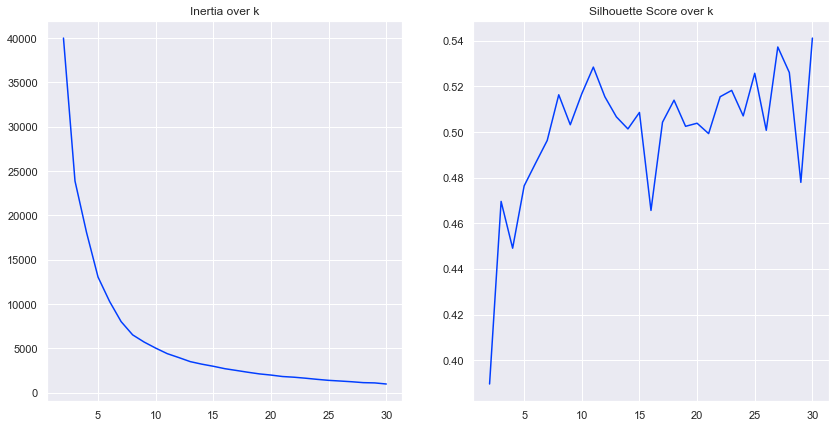

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(loc_df.k, loc_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(loc_df.k, loc_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [27]:
km_loc = KMeans(n_clusters=30)
km_loc.fit(X_sc)
# Scaled X gives best results
df['cluster_loc'] = km_loc.labels_

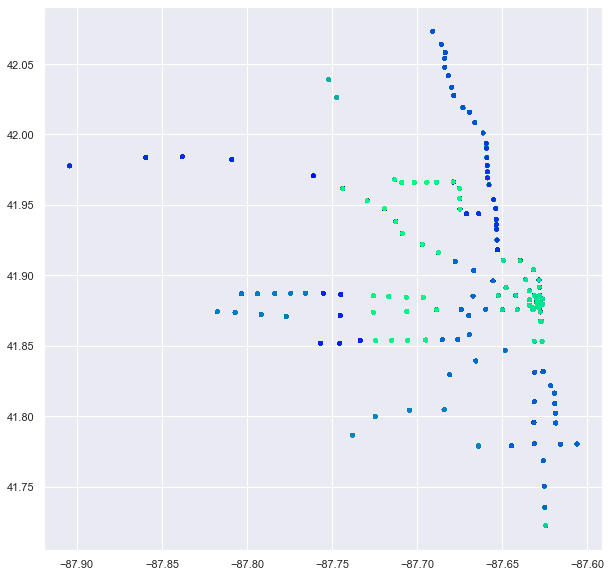

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))
plt.scatter(df.long, df.lat, c=df.cluster_loc, s=10, cmap="winter");

#### **KMeans Clustering: Location & Date**

In [29]:
X_locdate = train[['lat', 'long', 'month', 'year']]
sc = StandardScaler()
X_locdate_scaled = sc.fit_transform(X_locdate)

In [30]:
%%time
# GridSearch to find the best number of cluster
locdate_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_locdate_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_locdate_scaled, cl.labels_)
    locdate_list.append([k, inertia, sil])
    
locdate_df = pd.DataFrame(locdate_list)
locdate_df.columns = ['k', 'inertia', 'silhouette'] 
locdate_df.sort_values(by=['silhouette'], ascending=False).head(10)

Wall time: 14min 28s


,k,inertia,silhouette
0,2,102590.659738,0.603600
1,3,70002.197696,0.578388
11,13,11043.119608,0.513196
14,16,8479.315113,0.512306
28,30,3725.986858,0.508624
13,15,9032.525434,0.507854
26,28,4094.861338,0.507659
12,14,9968.384232,0.506832
7,9,17528.139766,0.503442
21,23,5450.223074,0.500334


Text(0.5, 1.0, 'Silhouette Score over k')

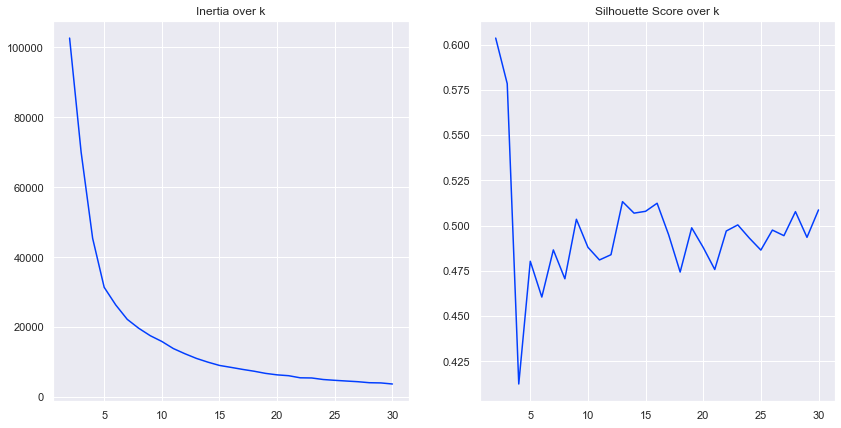

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(locdate_df.k, locdate_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(locdate_df.k, locdate_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [32]:
km_locdate = KMeans(n_clusters=2)
km_locdate.fit(X_sc)
# Scaled X gives best results
df['cluster_locdate'] = km_locdate.labels_

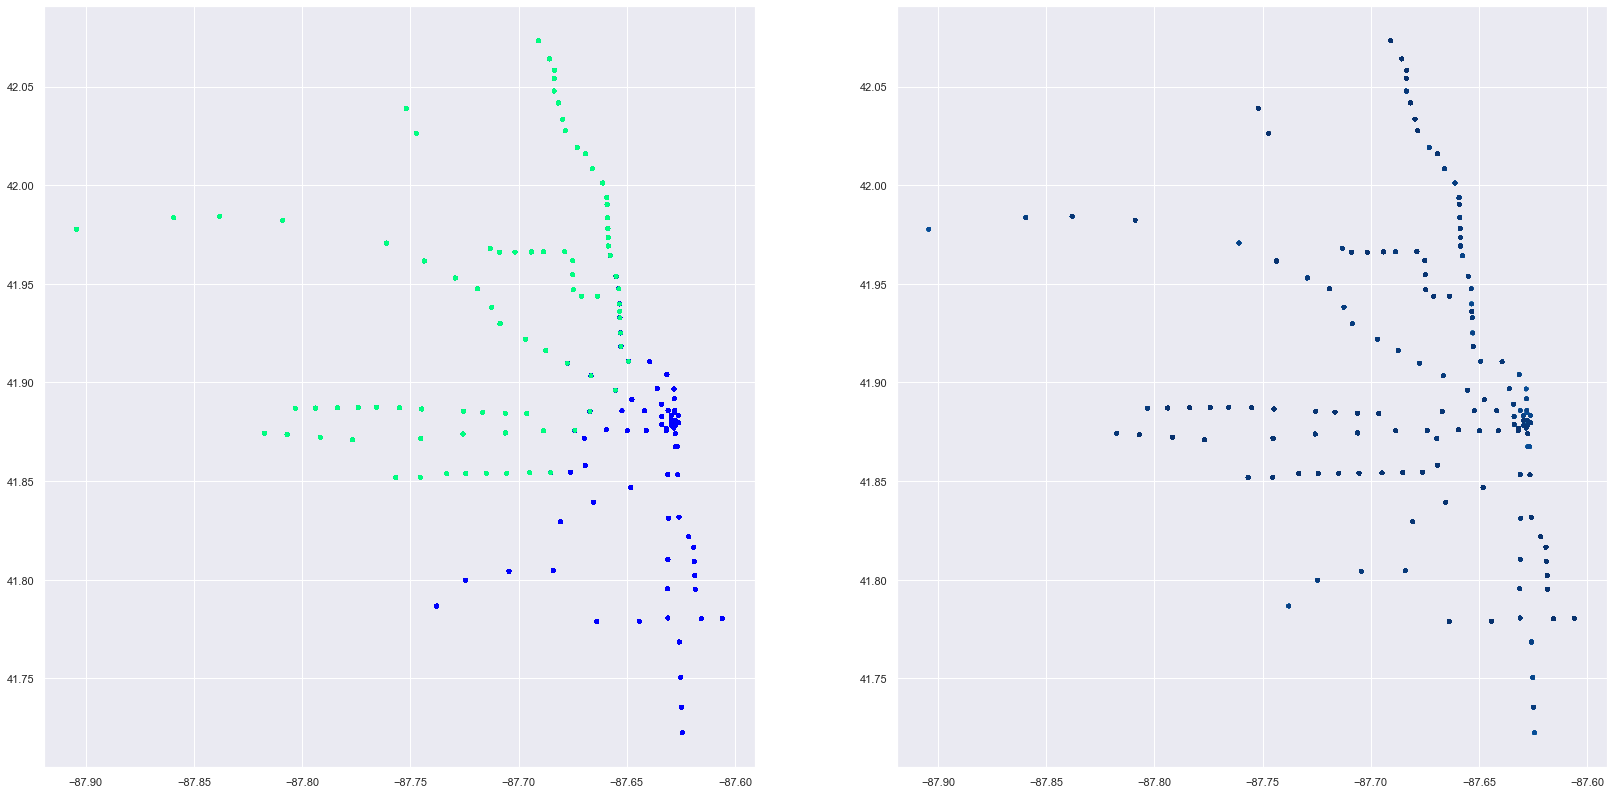

In [56]:
sns.set_style("darkgrid")
plt.figure(figsize=(28,14))
plt.subplot(1,2,1)
plt.scatter(df.long, df.lat, c=df.cluster_locdate, s=10, cmap="winter")
plt.subplot(1,2,2)
plt.scatter(df.long, df.lat, s=10, c =df['month_total'],cmap="Blues_r");
# plt.title('Clustering Train Ridership by Longitude, Latitude, Month, Year')
# plt.legend()
# plt.savefig('KMeansClustering_train.png');


In [59]:
df.groupby(['cluster_locdate']).mean()['month_total']

cluster_locdate
0    131517.485047
1     64887.640753
Name: month_total, dtype: float64

In [57]:
X_rider = train[['month_total']]
sc = StandardScaler()
X_rider_scaled = sc.fit_transform(X_rider)

In [58]:
%%time
# GridSearch to find the best number of cluster
rider_list = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_rider_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_rider_scaled, cl.labels_)
    rider_list.append([k, inertia, sil])
    
rider_df = pd.DataFrame(rider_list)
rider_df.columns = ['k', 'inertia', 'silhouette'] 
rider_df.sort_values(by=['silhouette'], ascending=False).head(10)

Wall time: 11min 8s


,k,inertia,silhouette
0,2,11686.584293,0.687415
1,3,5307.767853,0.619512
2,4,3295.635271,0.592036
3,5,2153.172057,0.591909
4,6,1552.587218,0.568399
5,7,1127.312324,0.566741
6,8,880.908487,0.560253
14,16,235.220274,0.533079
11,13,351.886278,0.532257
12,14,305.683781,0.532112


Text(0.5, 1.0, 'Silhouette Score over k')

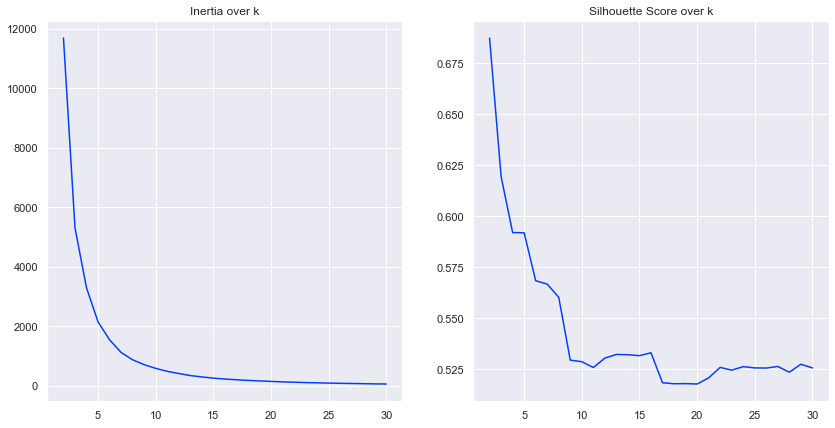

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(rider_df.k, rider_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(rider_df.k, rider_df.silhouette);
axes[1].set_title('Silhouette Score over k')

In [61]:
km_rider = KMeans(n_clusters=2)
km_rider.fit(X_sc)
# Scaled X gives best results
df['cluster_rider'] = km_rider.labels_

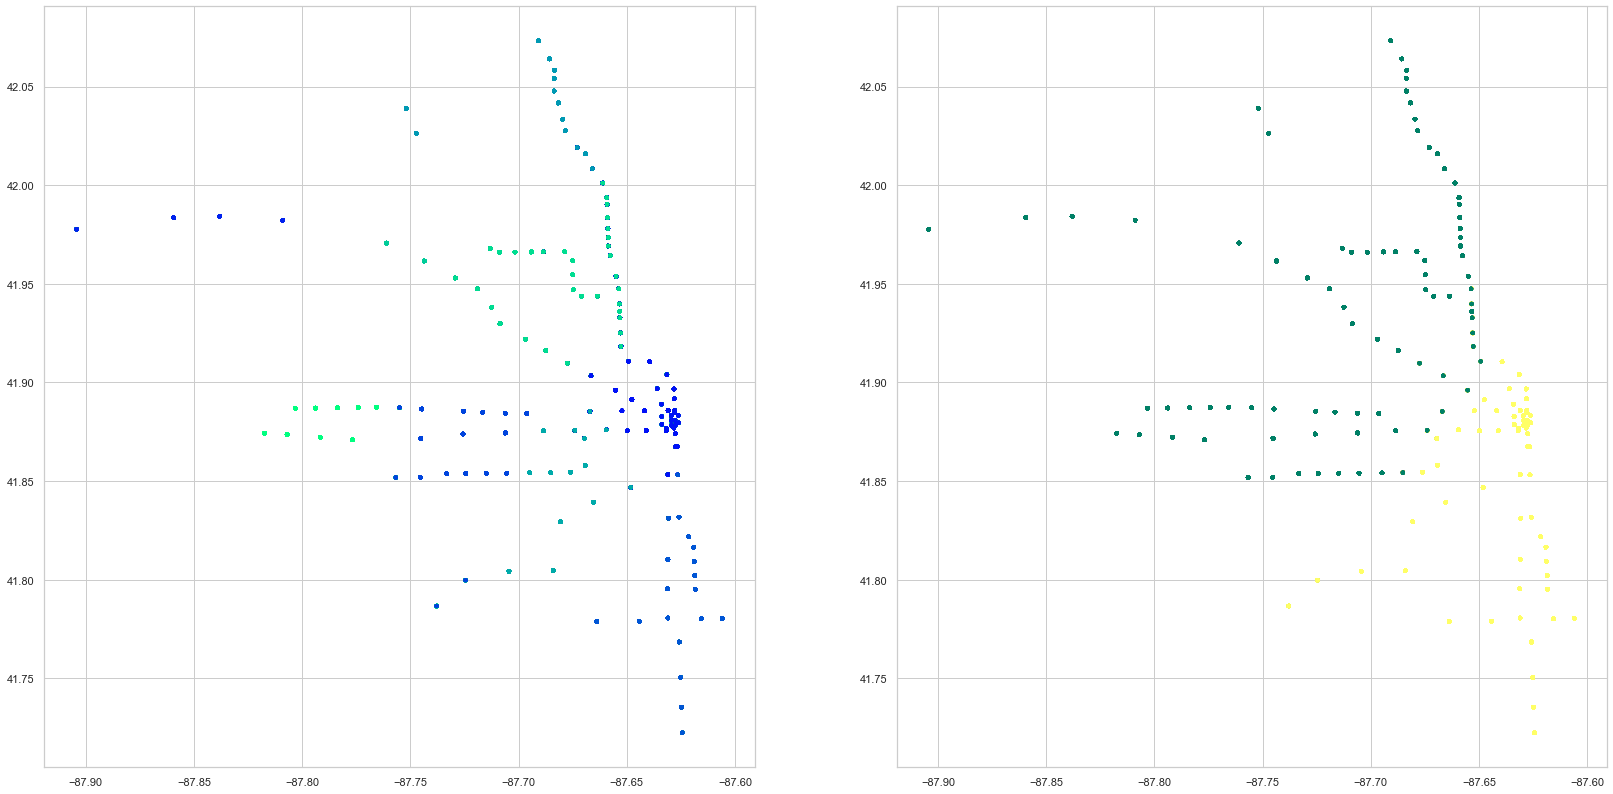

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(28,14))
plt.subplot(1,2,1)
plt.scatter(df.long, df.lat, c=df.cluster_rider, s=10, cmap="winter")
plt.subplot(1,2,2)
plt.scatter(df.long, df.lat, s=10, c =df.cluster_rider,cmap="summer");

In [69]:
# Check the average ridership by cluster
df.groupby(['cluster']).mean()['month_total']

cluster
0     447018.774744
1      75712.493657
2     106291.908844
3     119450.536253
4      29663.341999
5      44020.696589
6     294607.384132
7     280836.218884
8     203621.533869
9      33730.681569
10     46701.434460
11    172808.865121
12    111360.352761
13     53943.197495
14    172616.141631
15     50106.210100
Name: month_total, dtype: float64

In [38]:
df.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total,lat,long,cluster,cluster_all,cluster_date,cluster_loc,cluster_locdate
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,42.019063,-87.672892,3,1,1,18,1
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,42.015876,-87.669092,9,1,1,9,1
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,42.008362,-87.665909,3,1,1,18,1
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,42.001073,-87.661061,3,1,1,18,1
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,41.993664,-87.659202,3,1,1,23,1


In [39]:
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total,lat,long,year,month
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,42.019063,-87.672892,1.0,1.0
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,42.015876,-87.669092,1.0,1.0
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,42.008362,-87.665909,1.0,1.0
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,42.001073,-87.661061,1.0,1.0
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,41.993664,-87.659202,1.0,1.0


In [40]:
oh = OneHotEncoder(categories="auto", sparse=False)
oh.fit(km_locdate.labels_.reshape(-1, 1))

OneHotEncoder(sparse=False)

### **X, y, train, test, split**

In [70]:
km_rider = KMeans(n_clusters=16)
km_rider.fit(X_sc)
# Scaled X gives best results
df['cluster'] = km.labels_

In [71]:
train['cluster'] = df['cluster_locdate']

In [72]:
train['cluster'] = oh.fit_transform(np.array(train['cluster']).reshape(-1,1))

In [74]:
train.head()

,station_id,station_name,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,month_total,lat,long,year,month,cluster
0,40900,Howard,2001-01-01,6233.9,3814.5,2408.6,164447,42.019063,-87.672892,1.0,1.0,0.0
1,41190,Jarvis,2001-01-01,1489.1,1054.0,718.0,40567,42.015876,-87.669092,1.0,1.0,0.0
2,40100,Morse,2001-01-01,4412.5,3064.5,2087.8,119772,42.008362,-87.665909,1.0,1.0,0.0
3,41300,Loyola,2001-01-01,4664.5,3156.0,1952.8,125008,42.001073,-87.661061,1.0,1.0,0.0
4,40760,Granville,2001-01-01,3109.8,2126.0,1453.8,84189,41.993664,-87.659202,1.0,1.0,0.0


In [75]:
X=train[['avg_weekday_rides', 'avg_saturday_rides', 'avg_sunday-holiday_rides', 'lat', 'long', 'year', 'month', 'cluster']]
y = train['month_total']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

### **Linear Regression on Clusters**

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
print(f'Train score: {lr.score(X_train, y_train)}')
print()
print(f'Test score: {lr.score(X_test, y_test)}')

Train score: 0.9978939963472354

Test score: 0.9978430519199851
